>Accuracy

In [1]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, Y=None):
        pass

    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range (X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
            
        return pred

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

titanic_df = pd.read_csv(r'.\titanic\train.csv')
encoder = LabelEncoder()
encoder.fit(titanic_df['Sex'])
titanic_df['Sex'] = encoder.transform(titanic_df['Sex'])

target = titanic_df['Survived']
data = titanic_df.drop('Survived', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=0)

my_clf = MyDummyClassifier()
my_clf.fit(X_train, Y_train)
predictions = my_clf.predict(X_test)
print('Accuracy of Dummy Classifier:', accuracy_score(Y_test, predictions))

Accuracy of Dummy Classifier: 0.7877094972067039


In [3]:
from sklearn.datasets import load_digits


class MyFakeClassifier(BaseEstimator):
    def fit(self, X, Y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


digits = load_digits()

y = (digits.target == 7).astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(
    digits.data, y, random_state=11)


In [4]:
print('# of data:', digits.target.shape[0])
trues = y[y==True]
print('# of 7 in data:', trues.shape[0])
print('Ratio of 7 in data:',trues.shape[0]/digits.target.shape[0])

# of data: 1797
# of 7 in data: 179
Ratio of 7 in data: 0.09961046188091263


In [5]:
print('Size of test label set:', Y_test.shape)
print('Dist. of test label set:\n', pd.Series(Y_test).value_counts(), sep='')

fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, Y_train)
fakepred = fakeclf.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, fakepred))

Size of test label set: (450,)
Dist. of test label set:
0    405
1     45
dtype: int64
Accuracy: 0.9


>Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

>Precision and Recall

In [7]:
#Precision = TP/(FP+TP)
#Recall = TP/(FN+TP)
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import recall_score, precision_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix:\n', confusion, sep='')
    print('Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}'.format(
        accuracy, precision, recall))

In [8]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def label_encoding(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = label_encoding(df)
    return df

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv(r'.\titanic\train.csv')

target = titanic_df['Survived']
data = titanic_df.drop('Survived', axis=1)
data = transform_features(data)

X_train, X_test, Y_train, Y_test = train_test_split(
    data, target, test_size=0.2, random_state=11)

LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)
LG_pred = LogReg.predict(X_test)
get_clf_eval(LG_pred, Y_test)


Confusion Matrix:
[[104  13]
 [ 14  48]]
Accuracy: 0.8492, Precision: 0.7869, Recall: 0.7742


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>Trade-off between Precision & Recall

In [10]:
pred_proba = LogReg.predict_proba(X_test)
pred = LogReg.predict(X_test)
print('pred_proba.shape:', pred_proba.shape)
print('pred_proba[:3]:\n', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print('pred_proba_result:\n', pred_proba_result[:20])

pred_proba.shape: (179, 2)
pred_proba[:3]:
 [[0.46161968 0.53838032]
 [0.87858765 0.12141235]
 [0.87723954 0.12276046]]
pred_proba_result:
 [[0.46161968 0.53838032 1.        ]
 [0.87858765 0.12141235 0.        ]
 [0.87723954 0.12276046 0.        ]
 [0.88285166 0.11714834 0.        ]
 [0.85504702 0.14495298 0.        ]
 [0.88231291 0.11768709 0.        ]
 [0.88835666 0.11164334 0.        ]
 [0.20912699 0.79087301 1.        ]
 [0.78253105 0.21746895 0.        ]
 [0.36999788 0.63000212 1.        ]
 [0.89989426 0.10010574 0.        ]
 [0.87477198 0.12522802 0.        ]
 [0.87723362 0.12276638 0.        ]
 [0.88831122 0.11168878 0.        ]
 [0.43510975 0.56489025 1.        ]
 [0.85883259 0.14116741 0.        ]
 [0.90373558 0.09626442 0.        ]
 [0.73313381 0.26686619 0.        ]
 [0.72424423 0.27575577 0.        ]
 [0.1725394  0.8274606  1.        ]]


In [11]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [12]:
print(Y_test.shape)
print(pred_proba[:,1].shape)
print(pred_proba[:,1].reshape(-1,1).shape)


(179,)
(179,)
(179, 1)


In [13]:
pred_proba = LogReg.predict_proba(X_test)

binarizer = Binarizer(threshold=0.5)
pred_prob_1 = pred_proba[:,1].reshape(-1,1)
prediction = binarizer.fit_transform(pred_prob_1)

get_clf_eval(Y_test, prediction)

Confusion Matrix:
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Precision: 0.7742, Recall: 0.7869


In [14]:
pred_proba = LogReg.predict_proba(X_test)

#change threshold 0.5 -> 0.4
binarizer = Binarizer(threshold=0.4)
pred_prob_1 = pred_proba[:,1].reshape(-1,1)
prediction = binarizer.fit_transform(pred_prob_1)

get_clf_eval(Y_test, prediction)

Confusion Matrix:
[[99 19]
 [10 51]]
Accuracy: 0.8380, Precision: 0.7286, Recall: 0.8361


In [15]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(target, pred_prob_1, thresholds):
    for thresh in thresholds:
        binarizer = Binarizer(threshold=thresh)
        binarizer.fit(pred_prob_1)
        pred = binarizer.transform(pred_prob_1)
        pred1 = pred[:,1].reshape(-1,1)
        print('Threshold:', thresh)
        get_clf_eval(target, pred1)
        print('-------------')

get_eval_by_threshold(Y_test, pred_proba, thresholds)

Threshold: 0.4
Confusion Matrix:
[[99 19]
 [10 51]]
Accuracy: 0.8380, Precision: 0.7286, Recall: 0.8361
-------------
Threshold: 0.45
Confusion Matrix:
[[103  15]
 [ 12  49]]
Accuracy: 0.8492, Precision: 0.7656, Recall: 0.8033
-------------
Threshold: 0.5
Confusion Matrix:
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Precision: 0.7742, Recall: 0.7869
-------------
Threshold: 0.55
Confusion Matrix:
[[109   9]
 [ 15  46]]
Accuracy: 0.8659, Precision: 0.8364, Recall: 0.7541
-------------
Threshold: 0.6
Confusion Matrix:
[[112   6]
 [ 16  45]]
Accuracy: 0.8771, Precision: 0.8824, Recall: 0.7377
-------------


In [16]:
#Precision = TP/(FP+TP)
#Recall = TP/(FN+TP)
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import recall_score, precision_score

def get_clf_eval_1(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    return [accuracy, precision, recall]

In [17]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold1(target, pred_prob_1, thresholds):
    dict = {}

    for thresh in thresholds:
        binarizer = Binarizer(threshold=thresh)
        binarizer.fit(pred_prob_1)
        pred = binarizer.transform(pred_prob_1)
        pred1 = pred[:,1].reshape(-1,1)
        # print('Threshold:', thresh)
        acc_pre_re = get_clf_eval_1(target, pred1)
        dict[thresh] = acc_pre_re

    df = pd.DataFrame(dict)
    df.index = ['Accuracy', 'Precision', 'Recall']
    return df
    
get_eval_by_threshold(Y_test, pred_proba, thresholds)

Threshold: 0.4
Confusion Matrix:
[[99 19]
 [10 51]]
Accuracy: 0.8380, Precision: 0.7286, Recall: 0.8361
-------------
Threshold: 0.45
Confusion Matrix:
[[103  15]
 [ 12  49]]
Accuracy: 0.8492, Precision: 0.7656, Recall: 0.8033
-------------
Threshold: 0.5
Confusion Matrix:
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Precision: 0.7742, Recall: 0.7869
-------------
Threshold: 0.55
Confusion Matrix:
[[109   9]
 [ 15  46]]
Accuracy: 0.8659, Precision: 0.8364, Recall: 0.7541
-------------
Threshold: 0.6
Confusion Matrix:
[[112   6]
 [ 16  45]]
Accuracy: 0.8771, Precision: 0.8824, Recall: 0.7377
-------------


In [18]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = LogReg.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(
    Y_test, pred_proba_class1)
print('Shape of Thresholds:', thresholds.shape)

thr_index = np.arange(0,thresholds.shape[0], 15)
print("Sampled Thresholds' index:\n", thr_index, sep='')
print("Sampled Thresholds\n", np.round(thresholds[thr_index],4), sep='')
print("Precision for each Thresholds\n:", np.round(precisions[thr_index],4), sep='')
print("Recall for each Thresholds:\n", np.round(recalls[thr_index],4), sep='')

prc_dict = {}
for i in thr_index:
    prc_dict[thresholds[i]] = precisions[i], recalls[i]
prc_df = pd.DataFrame(prc_dict)
prc_df.index = ['Precision', 'Recall']
prc_df

Shape of Thresholds: (143,)
Sampled Thresholds' index:
[  0  15  30  45  60  75  90 105 120 135]
Sampled Thresholds
[0.104  0.1214 0.1403 0.1863 0.2807 0.4039 0.5649 0.667  0.8221 0.9473]
Precision for each Thresholds
:[0.3885 0.4403 0.4661 0.5392 0.6471 0.7286 0.8364 0.9487 0.9583 1.    ]
Recall for each Thresholds:
[1.     0.9672 0.9016 0.9016 0.9016 0.8361 0.7541 0.6066 0.377  0.1475]


,0.103962,0.121412,0.140311,0.186324,0.280733,0.403945,0.564890,0.666990,0.822132,0.947324
Precision,0.388535,0.440299,0.466102,0.539216,0.647059,0.728571,0.836364,0.948718,0.958333,1.000000
Recall,1.000000,0.967213,0.901639,0.901639,0.901639,0.836066,0.754098,0.606557,0.377049,0.147541


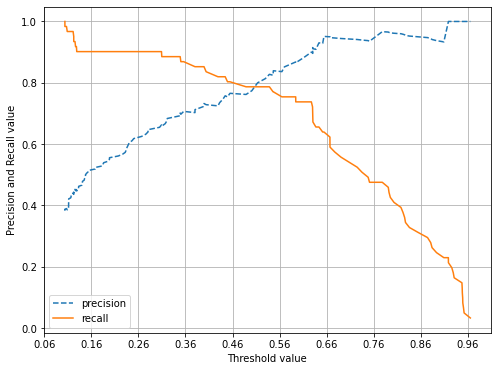

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

pred_proba_class1 = LogReg.predict_proba(X_test)[:, 1]

def precision_recall_curve_plot(Y_test, pred_proba_class1):
    precisions, recalls, thresholds = precision_recall_curve(Y_test, pred_proba_class1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(Y_test, pred_proba_class1)

>F1 Score

In [20]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, pred)
print('F1 Score:', np.round(f1, 4))

F1 Score: 0.7805


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import recall_score, precision_score

def get_clf_eval_2(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(Y_test, pred)
    return [accuracy, precision, recall, f1]

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold2(target, pred_prob_1, thresholds):
    dict = {}

    for thresh in thresholds:
        binarizer = Binarizer(threshold=thresh)
        binarizer.fit(pred_prob_1)
        pred = binarizer.transform(pred_prob_1)
        pred1 = pred[:,1].reshape(-1,1)
        # print('Threshold:', thresh)
        acc_pre_re_f1 = get_clf_eval_2(target, pred1)
        dict[thresh] = acc_pre_re_f1

    df = pd.DataFrame(dict)
    df.index = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
    return df
    
get_eval_by_threshold2(Y_test, pred_proba, thresholds)

,0.40,0.45,0.50,0.55,0.60
Accuracy,0.837989,0.849162,0.849162,0.865922,0.877095
Precision,0.728571,0.765625,0.774194,0.836364,0.882353
Recall,0.836066,0.803279,0.786885,0.754098,0.737705
F1_Score,0.778626,0.784000,0.780488,0.793103,0.803571


>ROC(Receiver Operation Characteristic) Curve & AUC(Area Under Curve) Score

In [22]:
from sklearn.metrics import roc_curve

pred_proba_class1 = LogReg.predict_proba(X_test)[:,1]

FPRs, TPRs, thresholds = roc_curve(Y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0], 5)

print("Sampled Thresholds' index:\n", thr_index, sep='')
print("Sampled Thresholds\n", np.round(thresholds[thr_index],4), sep='')
print("False Positive Rate for each Thresholds\n:", np.round(FPRs[thr_index],4), sep='')
print("True Positive Rate for each Thresholds:\n", np.round(TPRs[thr_index],4), sep='')

ROC_dict = {}
for i in thr_index:
    ROC_dict[thresholds[i]] = FPRs[i], TPRs[i]
ROC_df = pd.DataFrame(ROC_dict)
ROC_df.index = ['FPR', 'TPR']
ROC_df

Sampled Thresholds' index:
[ 1  6 11 16 21 26 31 36 41 46 51]
Sampled Thresholds
[0.9652 0.6543 0.6303 0.5649 0.4546 0.3803 0.3092 0.1291 0.1228 0.1117
 0.104 ]
False Positive Rate for each Thresholds
:[0.     0.0169 0.0339 0.0763 0.1271 0.1864 0.2373 0.5763 0.6186 0.7542
 0.8136]
True Positive Rate for each Thresholds:
[0.0328 0.6393 0.7049 0.7541 0.8033 0.8525 0.9016 0.9016 0.9508 0.9672
 1.    ]


,0.965154,0.654265,0.630328,0.564890,0.454600,0.380268,0.309167,0.129135,0.122761,0.111689,0.103962
FPR,0.000000,0.016949,0.033898,0.076271,0.127119,0.186441,0.237288,0.576271,0.618644,0.754237,0.813559
TPR,0.032787,0.639344,0.704918,0.754098,0.803279,0.852459,0.901639,0.901639,0.950820,0.967213,1.000000


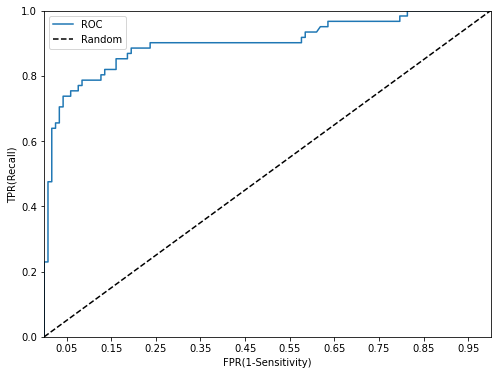

In [23]:
def roc_curve_plt(Y_test, pred_proba_class1):
    FPRs, TPRs, thresholds = roc_curve(Y_test, pred_proba_class1)
    
    plt.figure(figsize=(8,6))
    plt.plot(FPRs, TPRs, label = 'ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    

roc_curve_plt(Y_test, pred_proba_class1)

In [24]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(Y_test, pred_proba_class1)
print('ROC AUC:', roc_score)

ROC AUC: 0.9024034454015004
